### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
import pandas as pd
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

In [9]:
for nombre, df in tiendas.items():
    df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")

ingresos = pd.Series({nombre: df["Precio"].sum() for nombre, df in tiendas.items()})
ingresos = ingresos.sort_values(ascending=False)

ingresos

ingresos.map(lambda x: f"{x:,.0f}")



,0
Tienda 1,"1,150,880,400"
Tienda 2,"1,116,343,500"
Tienda 3,"1,098,019,600"
Tienda 4,"1,038,375,700"


# 2. Ventas por categoría

In [11]:
ventas_por_categoria = {}

for nombre, df in tiendas.items():
    conteo = df["Categoría del Producto"].value_counts()
    ventas_por_categoria[nombre] = conteo

for nombre, conteo in ventas_por_categoria.items():
    print(f"\n--- {nombre} (Top 10 categorías) ---")
    display(conteo.head(10))



--- Tienda 1 (Top 10 categorías) ---


,count
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171



--- Tienda 2 (Top 10 categorías) ---


,count
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181



--- Tienda 3 (Top 10 categorías) ---


,count
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177



--- Tienda 4 (Top 10 categorías) ---


,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


# 3. Calificación promedio de la tienda


In [13]:
for nombre, df in tiendas.items():
    df["Calificación"] = pd.to_numeric(df["Calificación"], errors="coerce")

calif_promedio = pd.Series({nombre: df["Calificación"].mean() for nombre, df in tiendas.items()})
calif_promedio = calif_promedio.sort_values(ascending=False)

calif_promedio

calif_promedio.round(2)


,0
Tienda 3,4.05
Tienda 2,4.04
Tienda 4,4.00
Tienda 1,3.98


# 4. Productos más y menos vendidos

In [15]:
resumen_productos = []

for nombre, df in tiendas.items():
    conteo = df["Producto"].value_counts()

    mas_vendido = conteo.index[0]
    mas_vendido_cant = int(conteo.iloc[0])

    menos_vendido = conteo.index[-1]
    menos_vendido_cant = int(conteo.iloc[-1])

    resumen_productos.append({
        "Tienda": nombre,
        "Más vendido": mas_vendido,
        "Cantidad (más vendido)": mas_vendido_cant,
        "Menos vendido": menos_vendido,
        "Cantidad (menos vendido)": menos_vendido_cant
    })

df_prod = pd.DataFrame(resumen_productos)
df_prod


for nombre, df in tiendas.items():
    print(f"\n--- {nombre} (Top 5 productos) ---")
    display(df["Producto"].value_counts().head(5))


df_prod



--- Tienda 1 (Top 5 productos) ---


,count
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56



--- Tienda 2 (Top 5 productos) ---


,count
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58



--- Tienda 3 (Top 5 productos) ---


,count
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55



--- Tienda 4 (Top 5 productos) ---


,count
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55


,Tienda,Más vendido,Cantidad (más vendido),Menos vendido,Cantidad (menos vendido)
0,Tienda 1,Microondas,60,Celular ABXY,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


# 5. Envío promedio por tienda

In [16]:
import pandas as pd

for nombre, df in tiendas.items():
    df["Costo de envío"] = pd.to_numeric(df["Costo de envío"], errors="coerce")

envio_promedio = pd.Series({nombre: df["Costo de envío"].mean() for nombre, df in tiendas.items()})
envio_promedio = envio_promedio.sort_values(ascending=True)

envio_promedio.round(2)


,0
Tienda 4,23459.46
Tienda 3,24805.68
Tienda 2,25216.24
Tienda 1,26018.61


# Resumen Final

In [18]:
# Resumen general por tienda: ingresos, calificación promedio y envío promedio
resumen = pd.DataFrame({
    "Ingresos": ingresos,
    "Calificación promedio": calif_promedio,
    "Envío promedio": envio_promedio
})

resumen

resumen_formateado = resumen.copy()
resumen_formateado["Ingresos"] = resumen_formateado["Ingresos"].map(lambda x: f"{x:,.0f}")
resumen_formateado["Envío promedio"] = resumen_formateado["Envío promedio"].map(lambda x: f"{x:,.2f}")
resumen_formateado["Calificación promedio"] = resumen_formateado["Calificación promedio"].round(2)
resumen_formateado



,Ingresos,Calificación promedio,Envío promedio
Tienda 1,"1,150,880,400",3.98,"26,018.61"
Tienda 2,"1,116,343,500",4.04,"25,216.24"
Tienda 3,"1,098,019,600",4.05,"24,805.68"
Tienda 4,"1,038,375,700",4.00,"23,459.46"


# Graficos

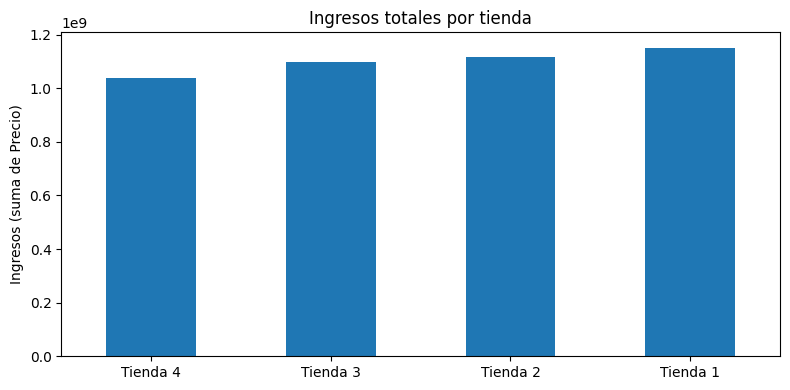

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
ingresos.sort_values().plot(kind="bar")
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingresos (suma de Precio)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


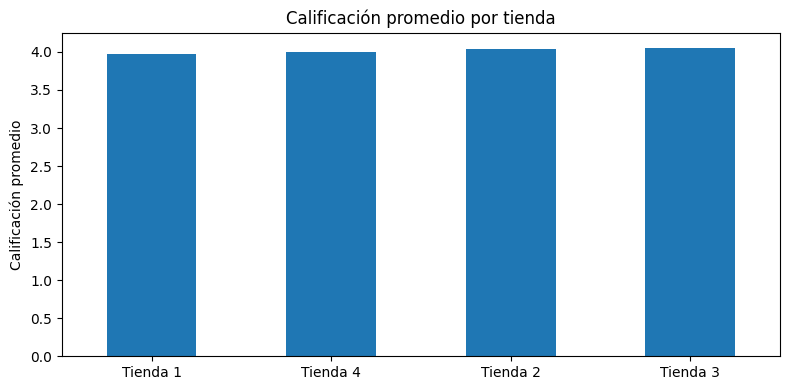

In [20]:
plt.figure(figsize=(8,4))
calif_promedio.sort_values().plot(kind="bar")
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


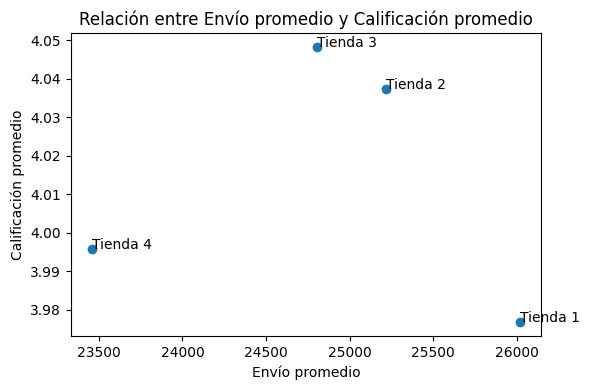

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(resumen["Envío promedio"], resumen["Calificación promedio"])

for tienda_nombre, row in resumen.iterrows():
    plt.text(row["Envío promedio"], row["Calificación promedio"], tienda_nombre)

plt.title("Relación entre Envío promedio y Calificación promedio")
plt.xlabel("Envío promedio")
plt.ylabel("Calificación promedio")
plt.tight_layout()
plt.show()


# Informe Final — Desafío Alura Store

## 1. Introducción
El objetivo de este análisis es evaluar el desempeño de las cuatro tiendas de Alura Store para recomendar al Sr. Juan cuál debería vender, considerando métricas de ingresos, categorías más vendidas, calificación promedio de clientes, productos más/menos vendidos y costo promedio de envío.

## 2. Resultados del análisis

### 2.1 Ingresos totales por tienda
Al sumar la columna **Precio** en cada tienda, se obtuvo:
- **Tienda 1:** 1.150.880.000 aprox.
- **Tienda 2:** 1.116.344.000 aprox.
- **Tienda 3:** 1.098.020.000 aprox.
- **Tienda 4:** 1.038.376.000 aprox.

La tienda con **menor facturación** es **Tienda 4**, mientras que la de **mayor facturación** es **Tienda 1**.

### 2.2 Ventas por categoría (popularidad)
Las categorías con mayor volumen de ventas se concentran principalmente en:
- **Muebles**, **Electrónicos** y **Juguetes** (dependiendo de la tienda).
Por ejemplo:
- En **Tienda 3** destacan *Muebles* (499) y *Electrónicos* (451).
- En **Tienda 4** destacan *Muebles* (480) y *Electrónicos* (451).

### 2.3 Calificación promedio por tienda
El promedio de satisfacción del cliente (columna **Calificación**) es:
- **Tienda 3:** 4.05 (mejor)
- **Tienda 2:** 4.04
- **Tienda 4:** 4.00
- **Tienda 1:** 3.98 (menor)

### 2.4 Productos más y menos vendidos
Se identificaron los productos con mayor y menor cantidad de ventas por tienda:
- **Tienda 1:** Más vendido *Microondas* (60) / Menos vendido *Celular ABXY* (33)
- **Tienda 2:** Más vendido *Iniciando en programación* (65) / Menos vendido *Juego de mesa* (32)
- **Tienda 3:** Más vendido *Kit de bancas* (57) / Menos vendido *Bloques de construcción* (35)
- **Tienda 4:** Más vendido *Cama box* (62) / Menos vendido *Guitarra eléctrica* (33)

### 2.5 Costo promedio de envío
El costo de envío promedio (pagado por el cliente) es:
- **Tienda 4:** 23,459.46 (más bajo)
- **Tienda 3:** 24,805.68
- **Tienda 2:** 25,216.24
- **Tienda 1:** 26,018.61 (más alto)

## 3. Conclusión y recomendación
Considerando todos los factores analizados, se recomienda que el Sr. Juan considere vender la **Tienda 4**.

**Justificación:**
- Es la tienda con **menor facturación total**, lo que indica menor desempeño en ingresos frente a las otras tres.
- Aunque su calificación promedio (4.00) y su envío promedio (el más bajo) no son malos, **no compensan** la diferencia de ingresos respecto a las demás.
- En términos generales, Tienda 4 presenta el desempeño económico más bajo, por lo que sería la opción más razonable para vender e invertir en un nuevo emprendimiento.
